In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import digamma
from sklearn.neighbors import KDTree, BallTree
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
import numpy.linalg as la
from numpy import log
from scipy.special import digamma
from sklearn.neighbors import BallTree, KDTree
import sklearn

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def reset():
    f =  ['year', 'Current_Assets', 'COGS', 'Depreciation_Amortization', 'EBITDA',
          
          'Inventory', 'Net_Income', 'Receivables', 'Market_Value', 'Net_Sales',
          
          'Total_Assets', 'Long-term_Debt', 'EBIT', 'Gross_Profit',
          
          'Current_Liabilities', 'Retained_Earnings', 'Total_Revenue',
          
          'Total_Liabilities', 'Operating_Expenses']
    

    tf =  ['continua', 'continua', 'continua', 'continua', 'continua',
          'continua', 'continua', 'continua', 'continua', 'continua',
          'continua', 'continua', 'continua', 'continua',
          'continua', 'continua', 'continua', 
          'continua', 'continua']
    
    return f, tf

def load_from_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)
    
def plot_dataframe(df, path):
    features, tipos_variables = reset()
    
    reordered_df = pd.DataFrame()  # Empty DataFrame to store the rearranged rows
    for i in range(0, len(df), len(features)):
        group = df.iloc[i:i+len(features)]  # Obtain the group of rows
        reordered_group = group.set_index('Feature').reindex(features).reset_index()  # Reorder rows based on characteristics
        if i == 0:
            reordered_df = pd.concat([reordered_df, reordered_group])  # Concatenate the reorganized group to the final DataFrame
        else:
            reordered_df = pd.concat([reordered_df, reordered_group[['MI Value']]], axis=1)  # Concatenate the reorganized group to the final DataFrame
    
    reordered_df = reordered_df.drop(["Feature"], axis=1)
    reordered_df.columns = np.arange(0, reordered_df.shape[1], 1)

    scaler = MinMaxScaler()
    reordered_df = pd.DataFrame(scaler.fit_transform(reordered_df), columns=reordered_df.columns)
    
    feature_idx = {feature: idx for idx, feature in enumerate(features)}
    reordered_indices = [feature_idx[feature] for feature in new_order]
    reordered_data = reordered_df.iloc[reordered_indices, :]
    
    final_order = ['Year',
               'Current Assets', 'COGS', 'Depreciation Amortization', 'EBITDA',
               'Inventory', 'Net Income', 'Receivables', 'Market Value', 'Net Sales',
               'Total Assets', 'Long-term Debt', 'EBIT', 'Gross Profit',
               'Current Liabilities', 'Retained Earnings', 'Total Revenue',
               'Total Liabilities', 'Operating Expenses']
    
    plt.figure(figsize=(11,22))
    ax = plt.gca()
    heatmap = sns.heatmap(reordered_data, cmap='viridis', yticklabels=final_order, xticklabels=range(1,11), ax=ax, cbar=False)
    
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=22)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=22, rotation=90)

    # Create colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = heatmap.figure.colorbar(heatmap.collections[0], cax=cax)
    cbar.ax.tick_params(labelsize=22)

    # Set custom ticks on the colorbar
    num_ticks = 11
    tick_locs = np.linspace(reordered_data.values.min(), reordered_data.values.max(), num_ticks)
    cbar.set_ticks(tick_locs)
    cbar.set_ticklabels([f'{tick:.2f}' for tick in tick_locs])
    cbar.ax.tick_params(labelsize=22)

    plt.tight_layout(pad=0)
    plt.savefig(path, bbox_inches='tight', pad_inches=0)

    plt.show()

# VISUALIZATION

In [3]:
new_order = ['year',
       'Current_Assets', 'COGS', 'Depreciation_Amortization', 'EBITDA',
       'Inventory', 'Net_Income', 'Receivables', 'Market_Value', 'Net_Sales',
       'Total_Assets', 'Long-term_Debt', 'EBIT', 'Gross_Profit',
       'Current_Liabilities', 'Retained_Earnings', 'Total_Revenue',
       'Total_Liabilities', 'Operating_Expenses']

# BANKRUPTCY

In [4]:
import pickle
split_directory = './Results-App1/'

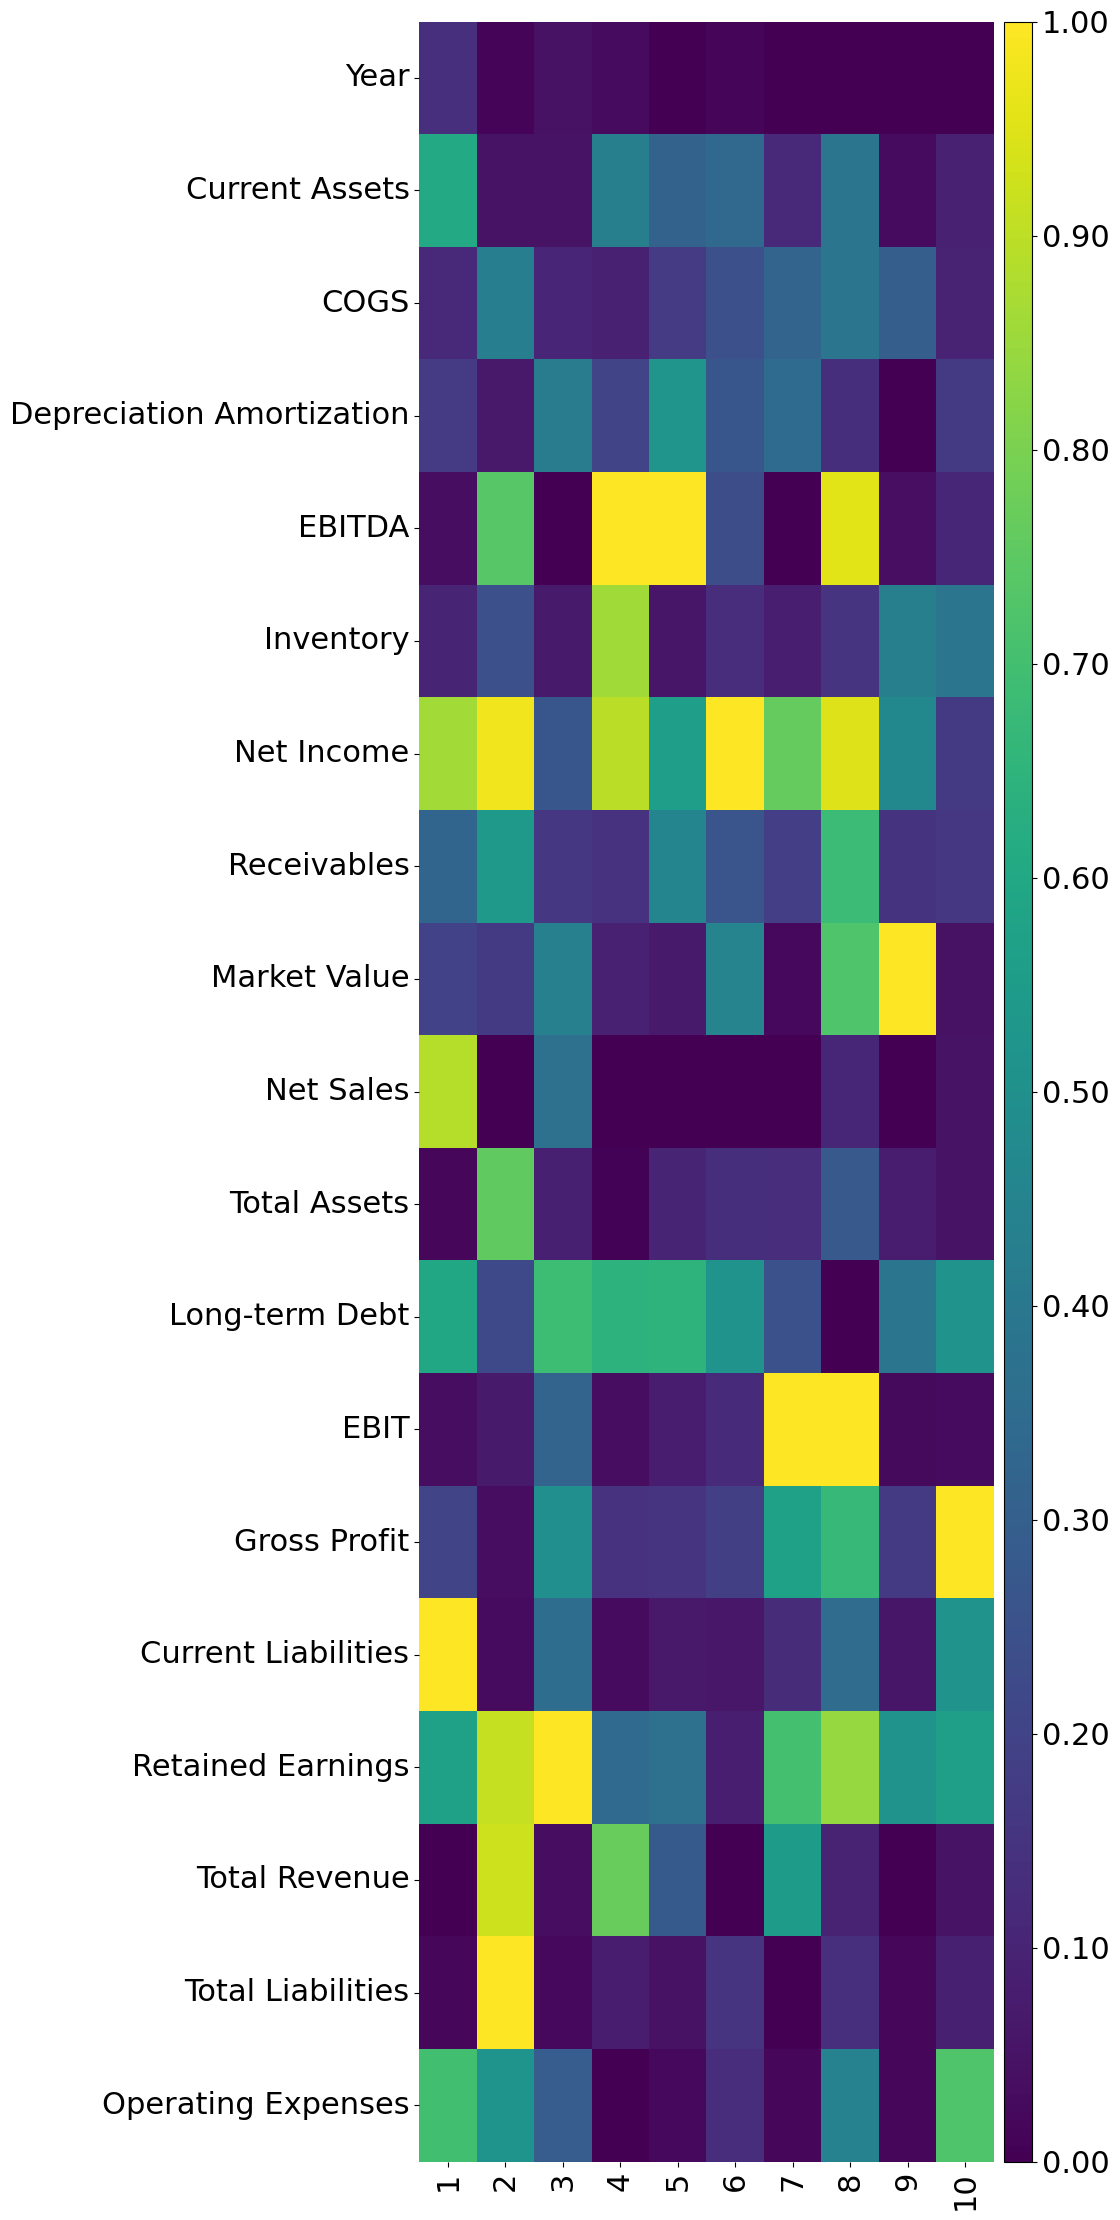

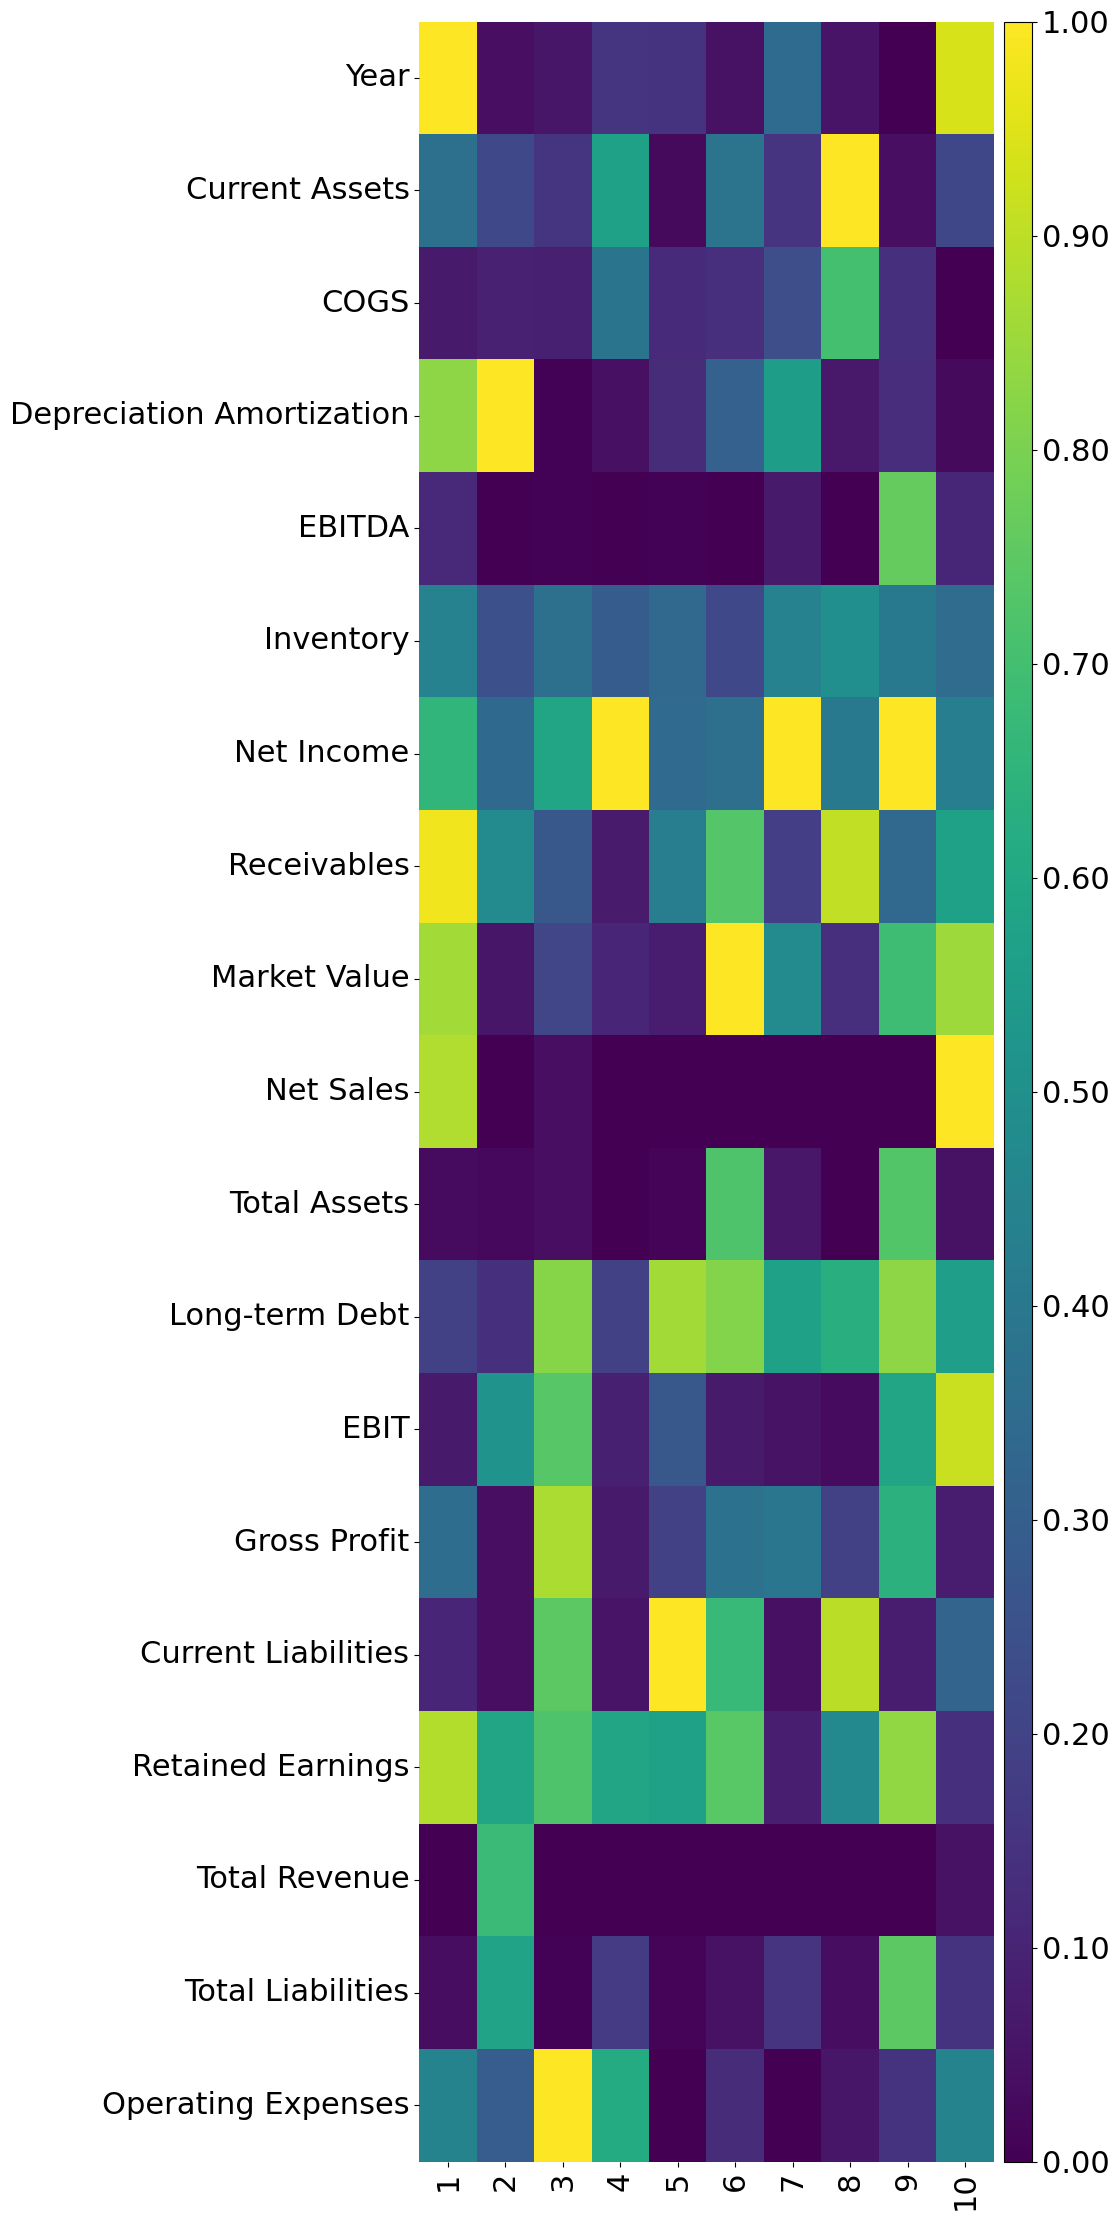

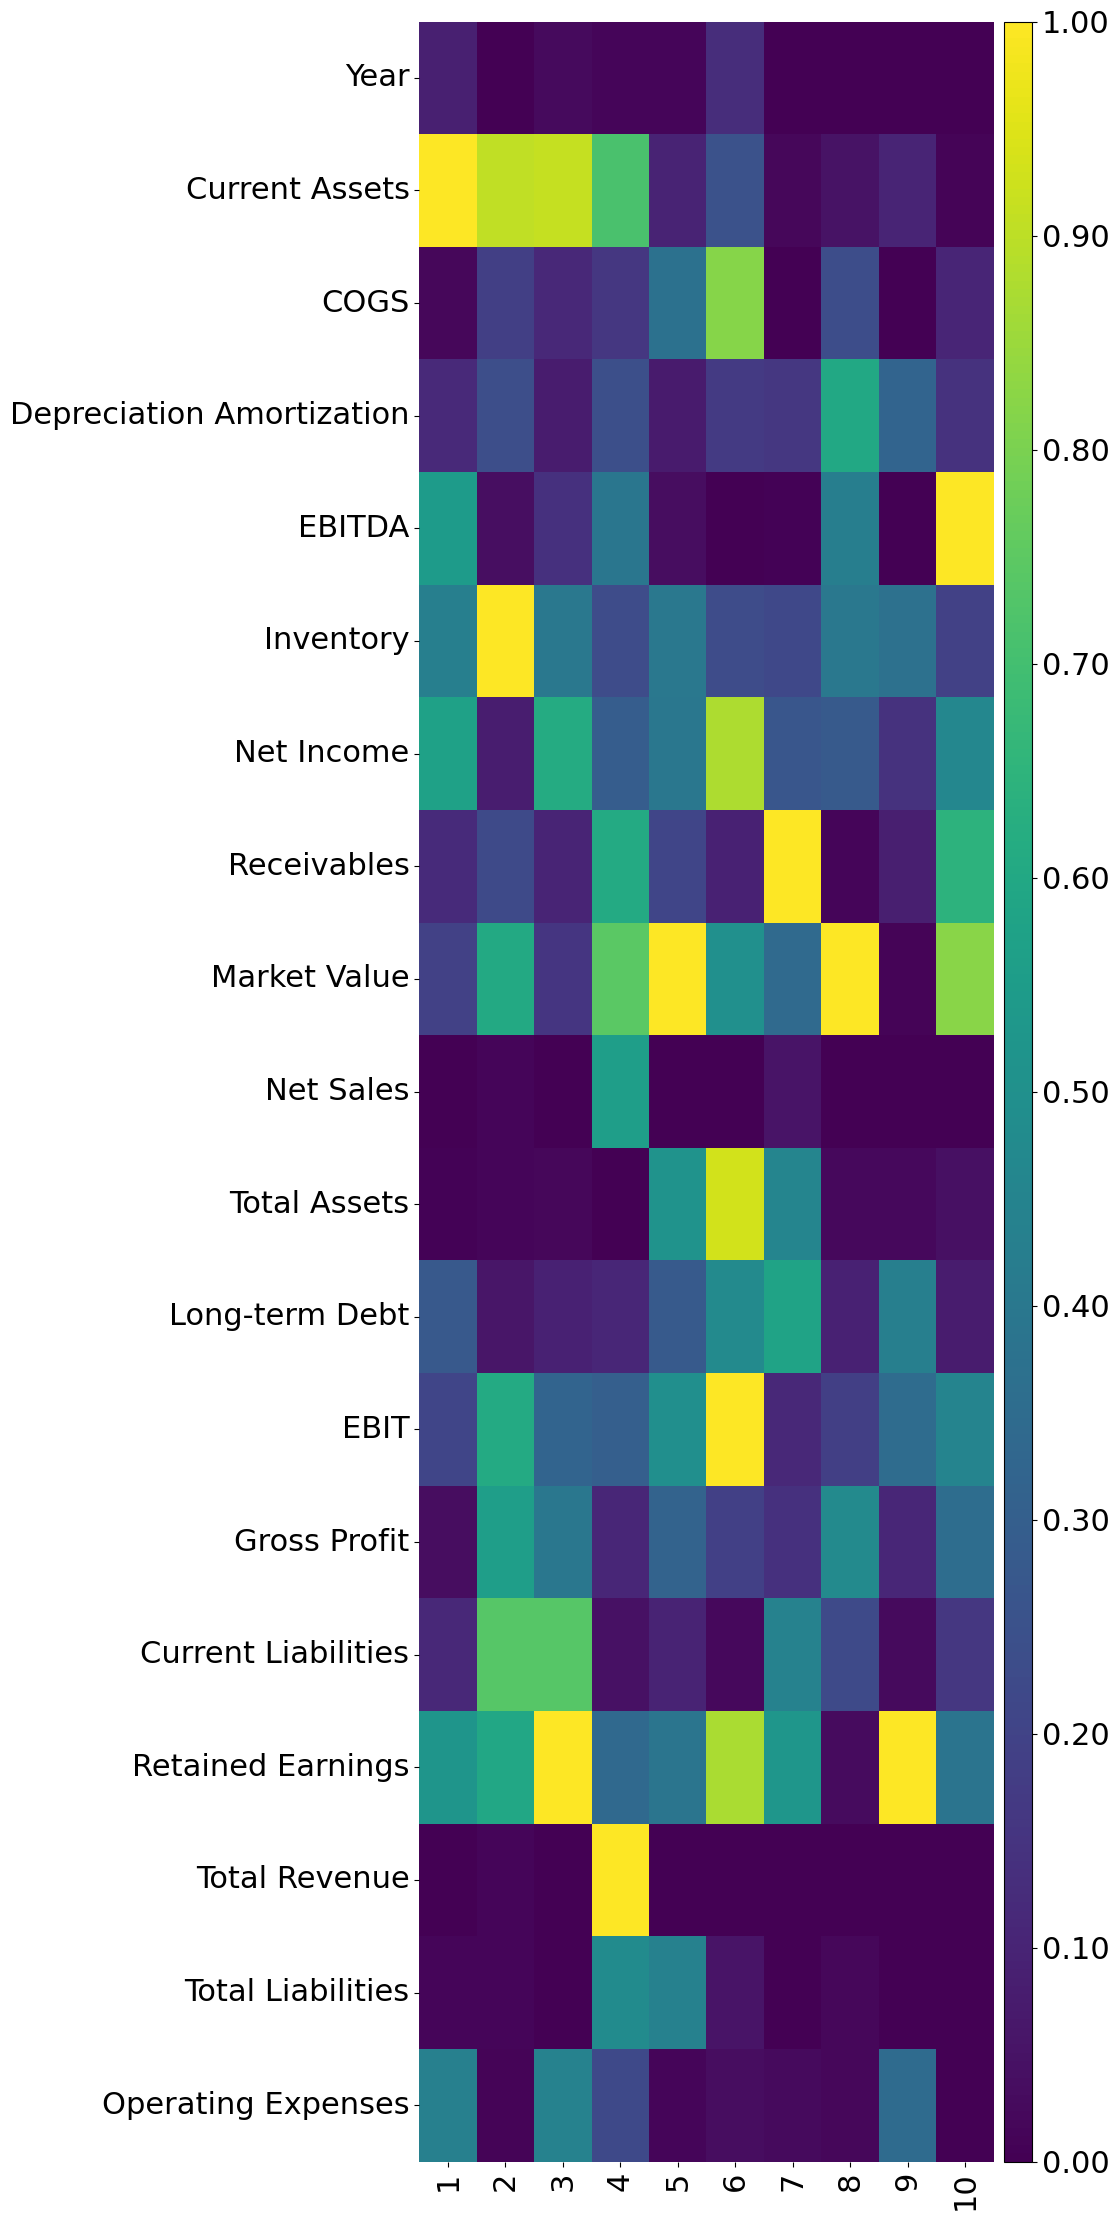

In [5]:
results_amr = load_from_pickle(os.path.join(split_directory, f"CMI_results_mdr.pkl"))
for split in [1, 2, 3]:
    df = results_amr[f'results_df_{split}']
    df.replace([np.inf, -np.inf], 0, inplace=True)
    plot_dataframe(df, f'../Figures/PRE-HOC/CMI-S{split}_mdr.pdf')

# No BANKRUPTCY

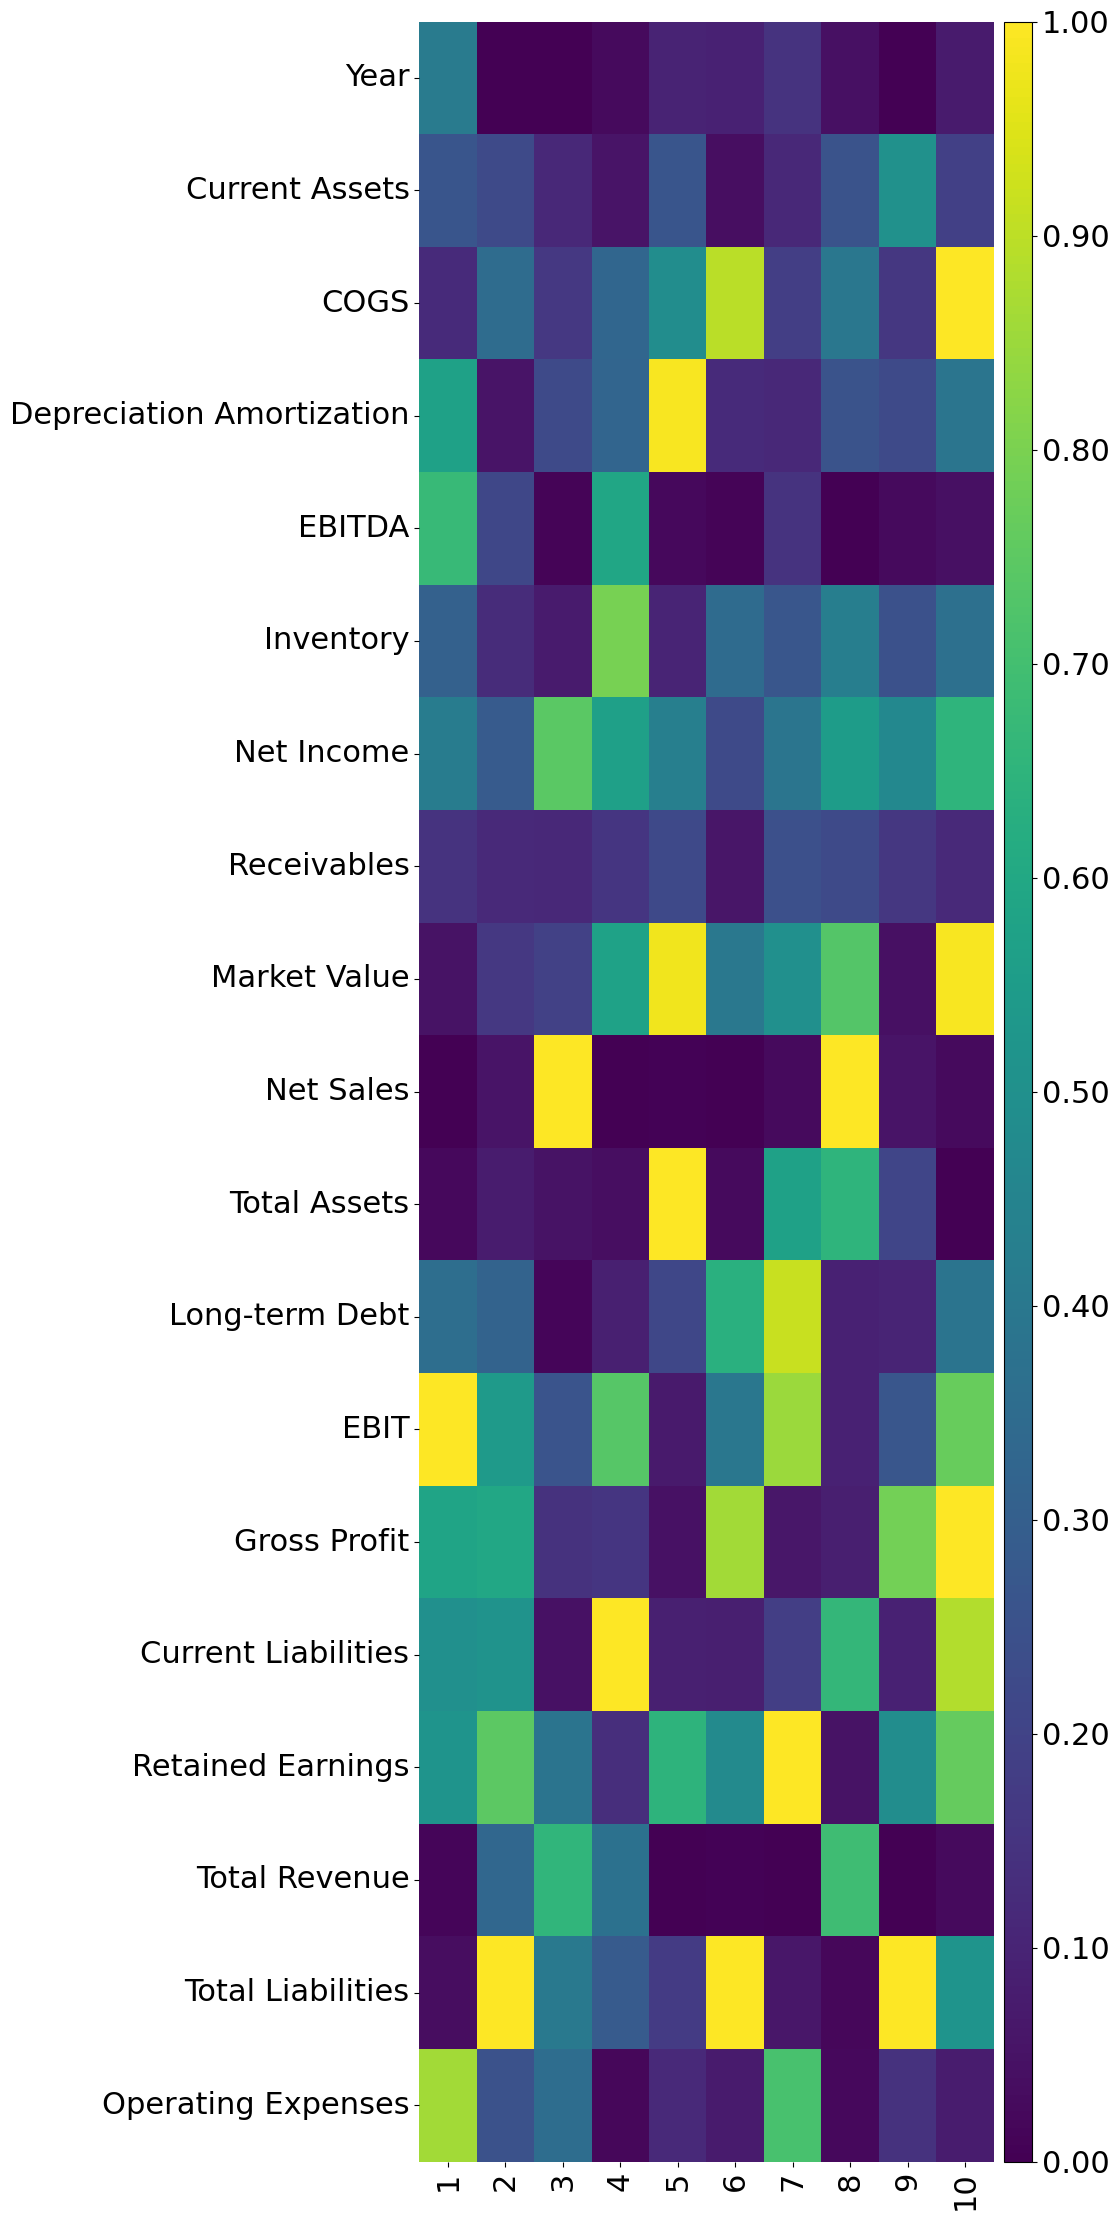

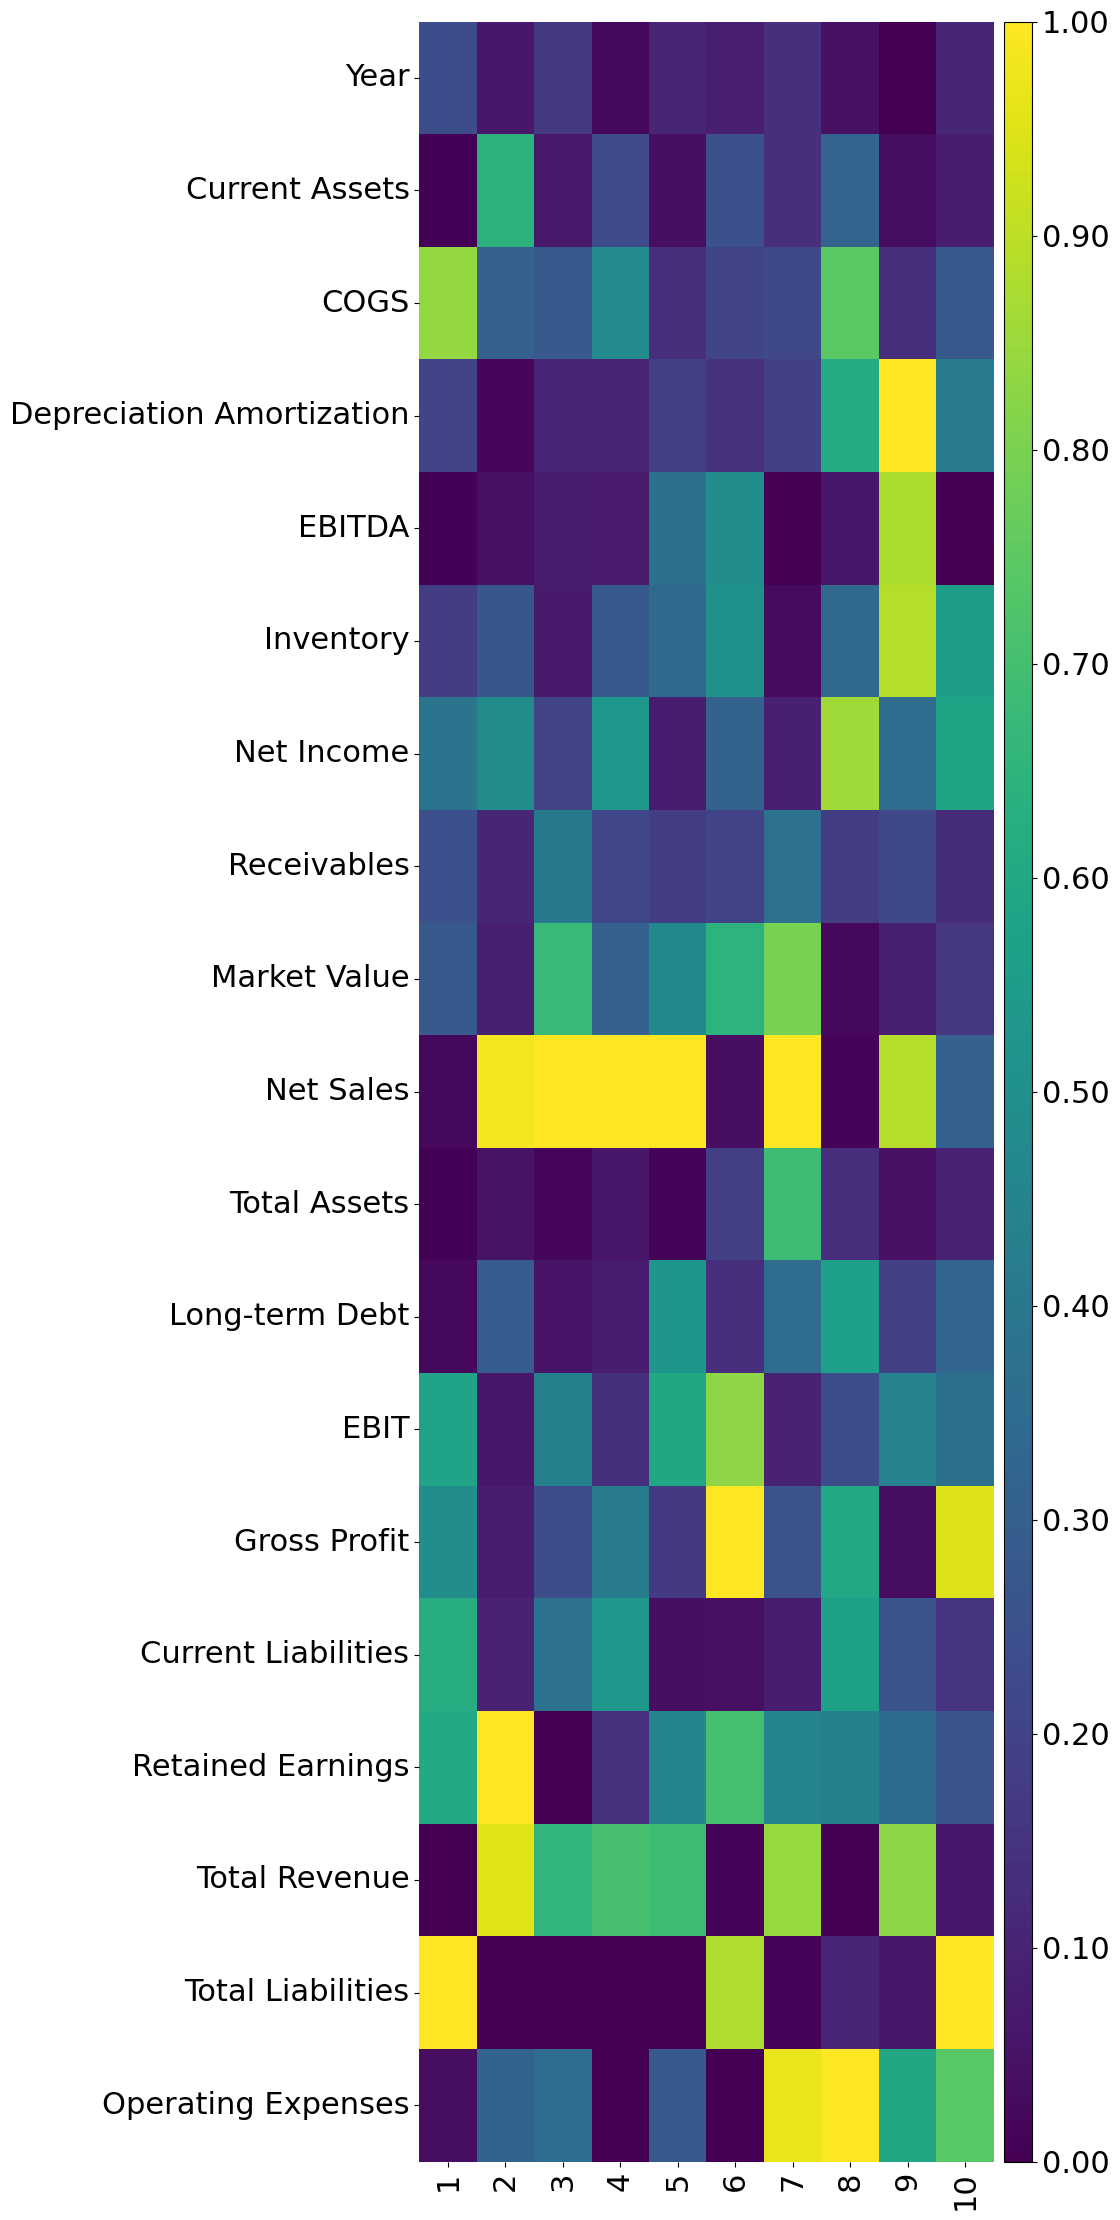

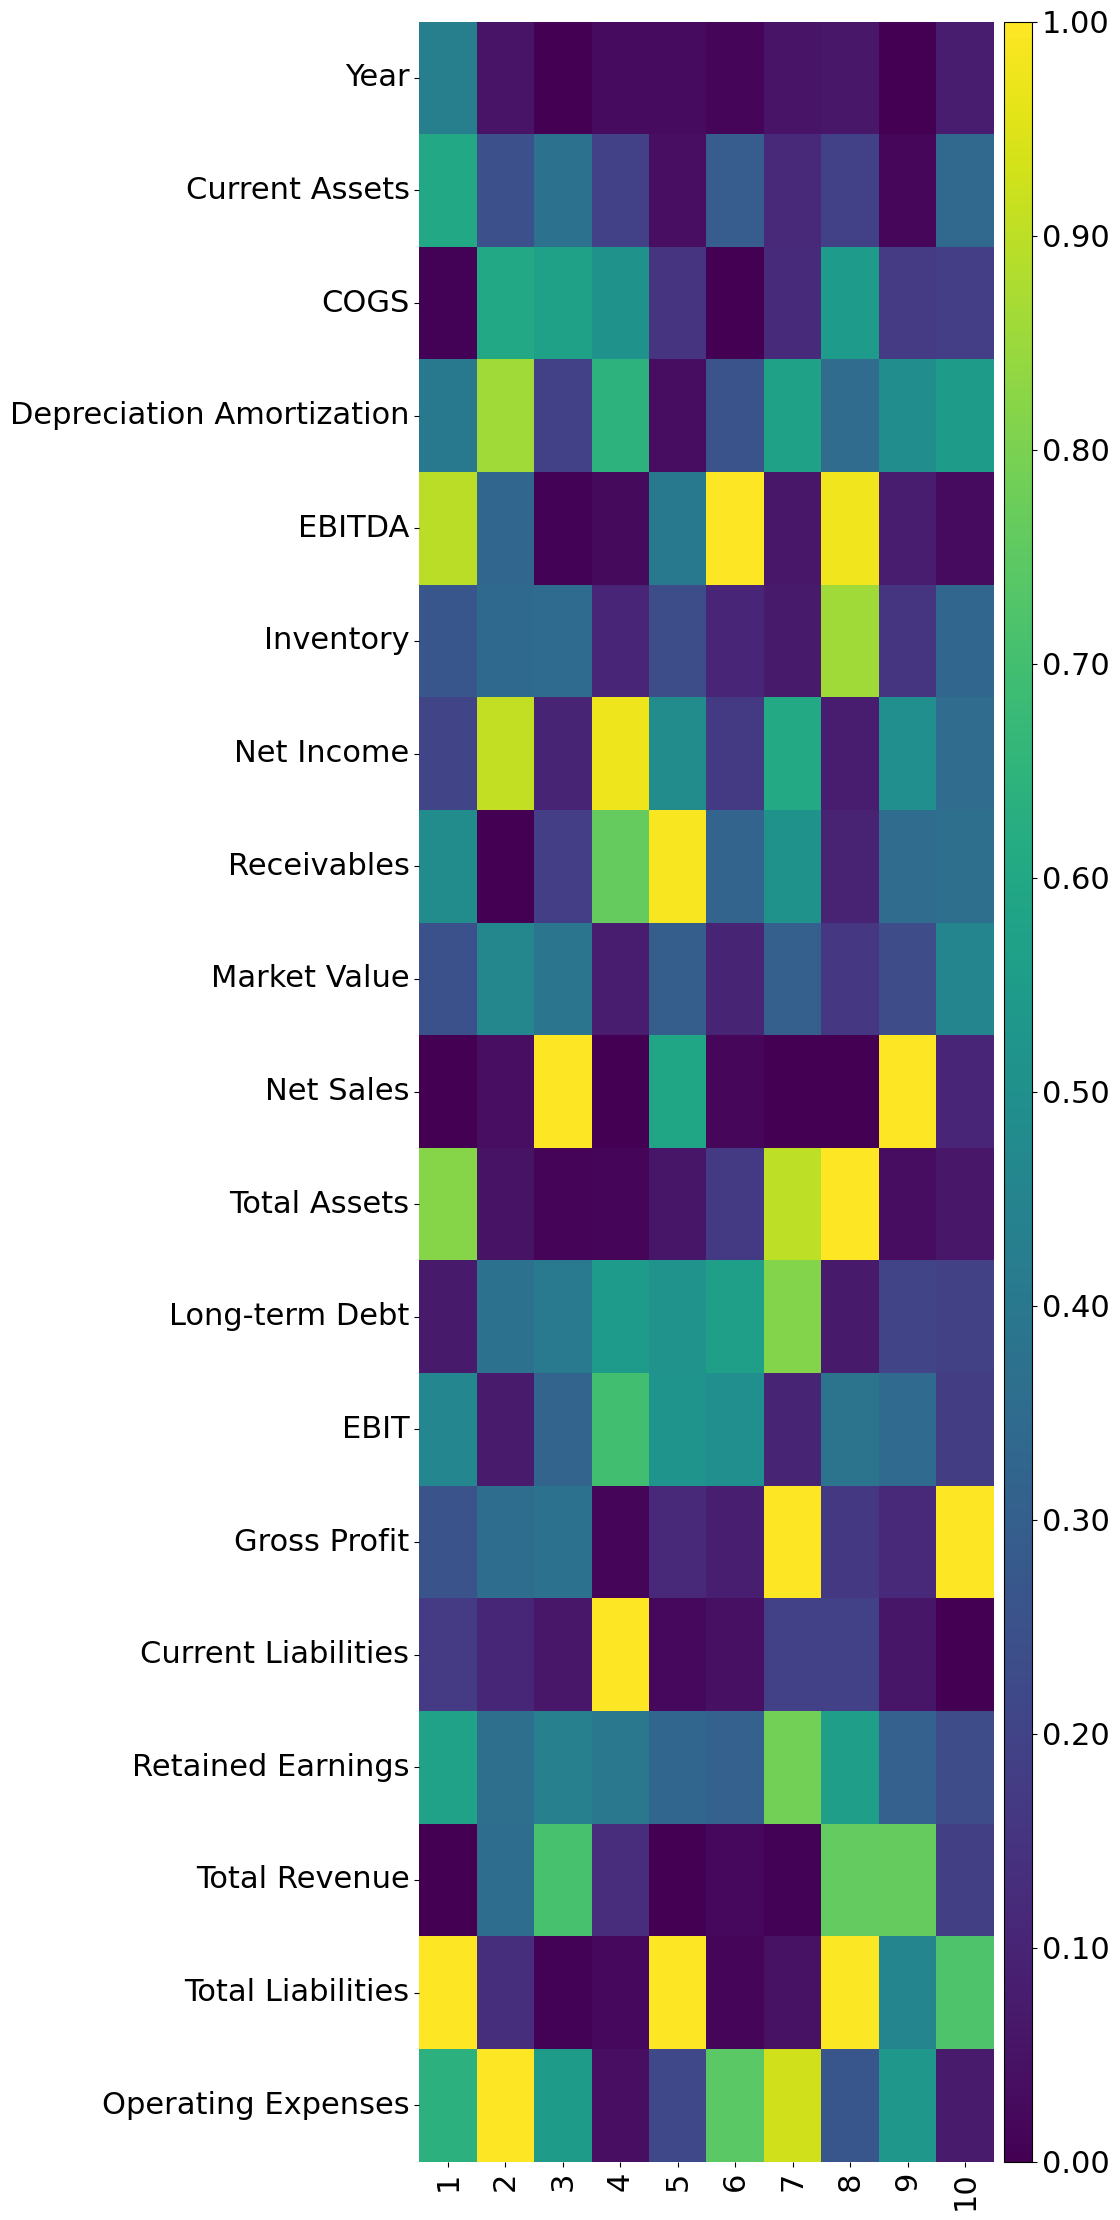

In [9]:
results_noamr = load_from_pickle(os.path.join(split_directory, f"CMI_results_nomdr.pkl"))
for split in [1, 2, 3]:  
    df = results_noamr[f'results_df_{split}']
    df.replace([np.inf, -np.inf], 0, inplace=True)
    plot_dataframe(df, f'../Figures/PRE-HOC/CMI-S{split}_nomdr.jpg')
    

## Population analysis

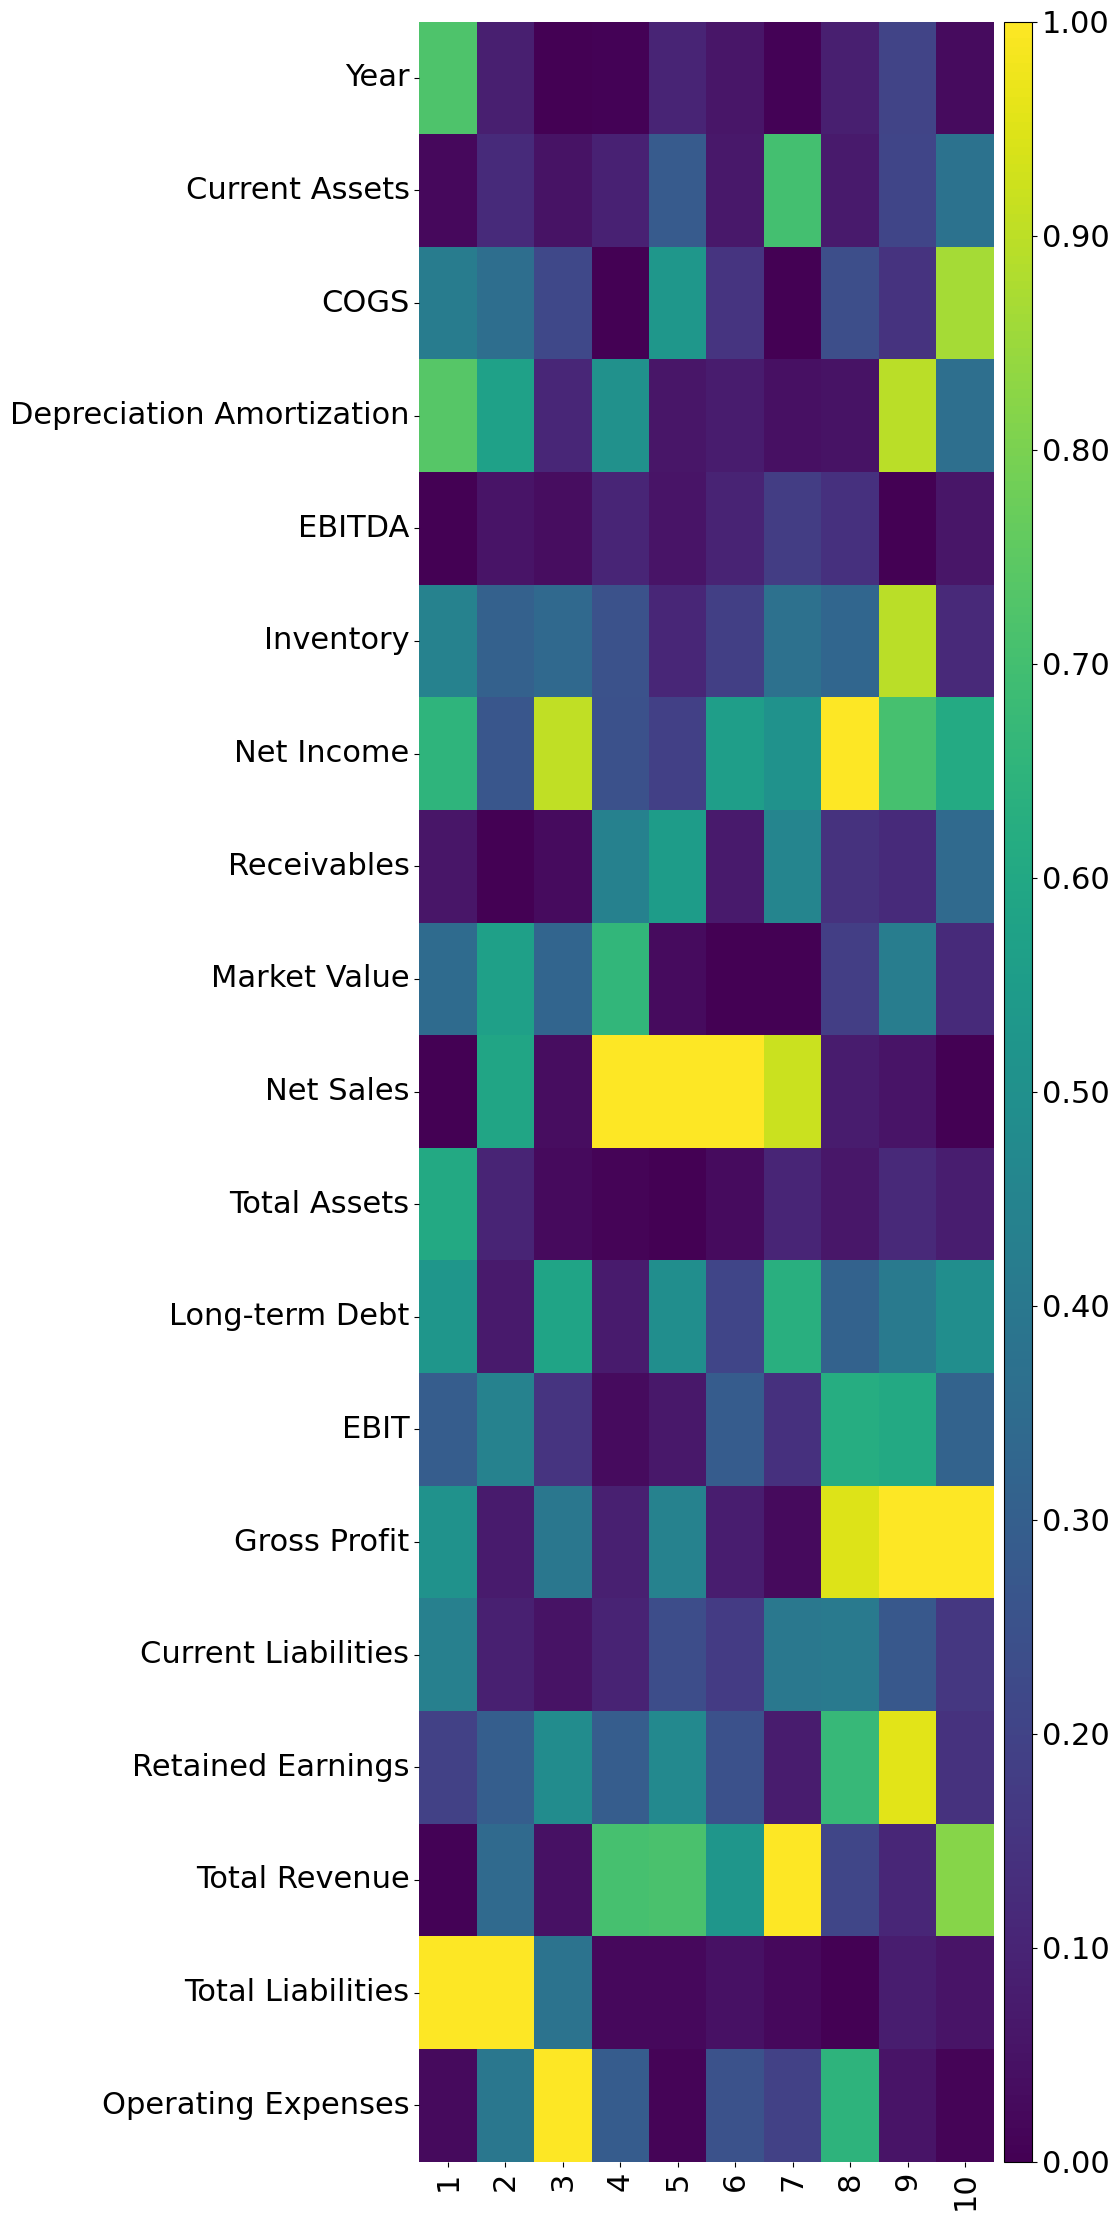

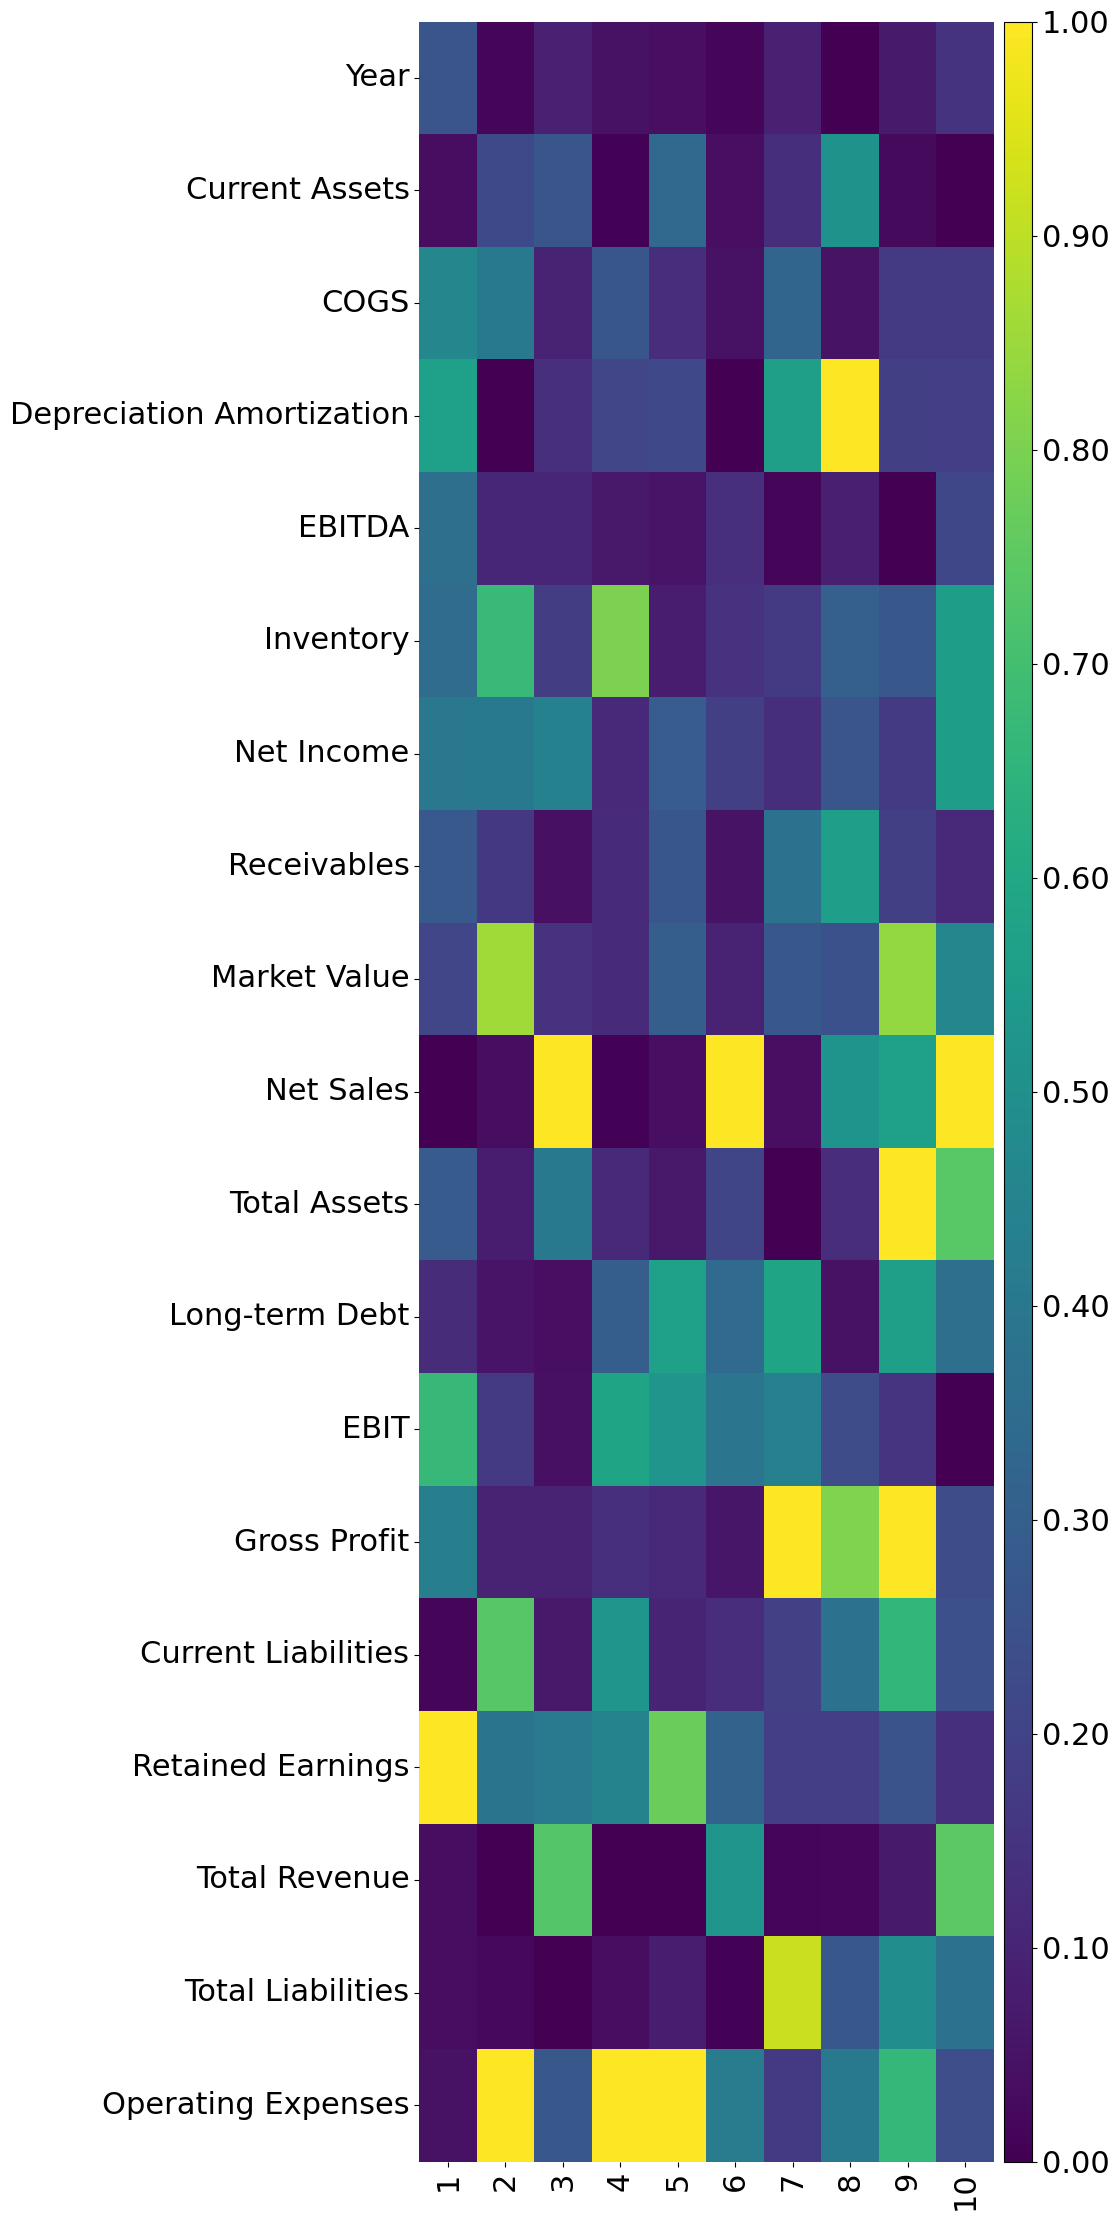

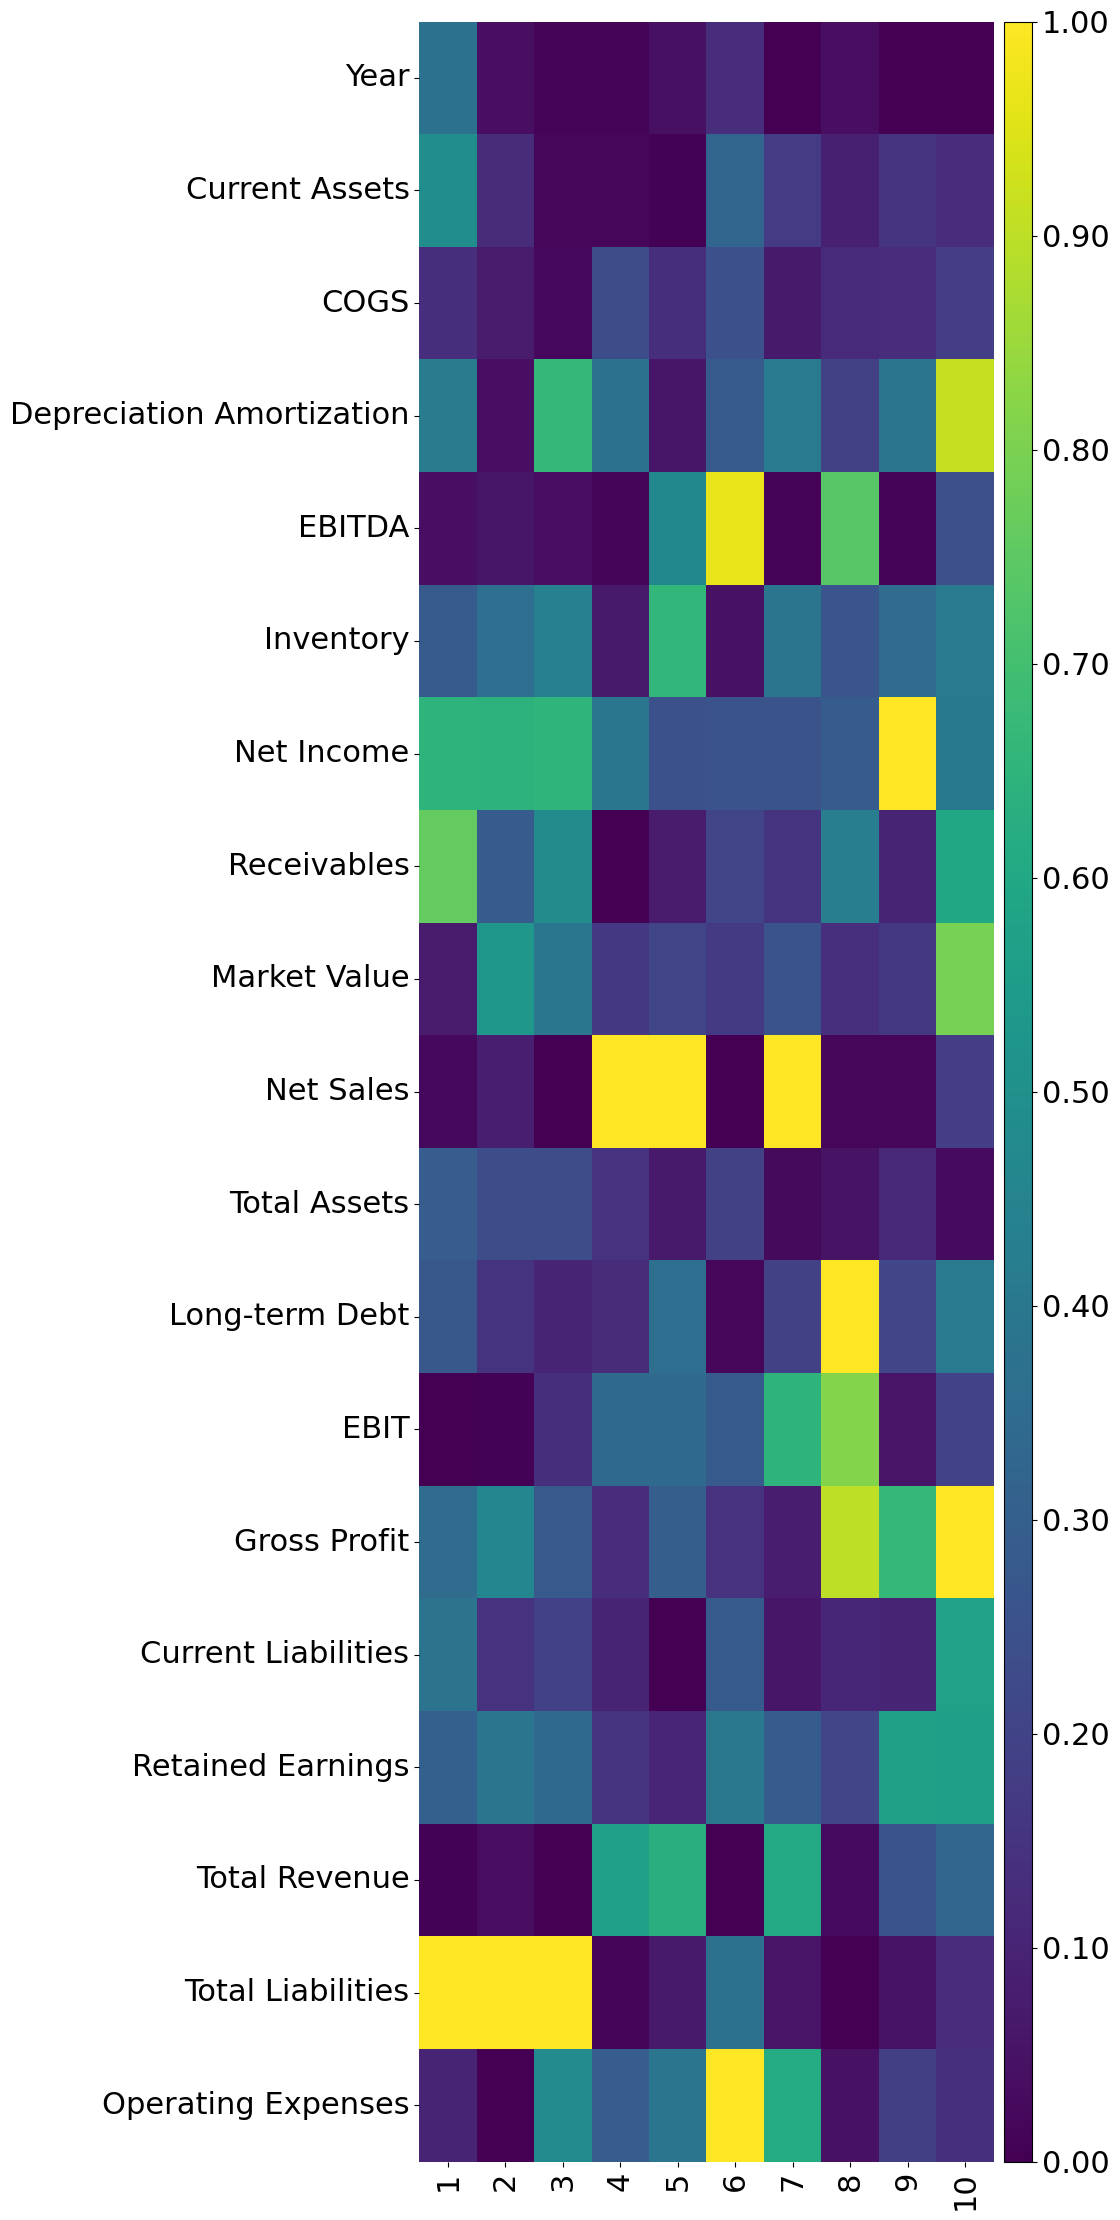

In [10]:
results_pop = load_from_pickle(os.path.join(split_directory, f"CMI_results_population.pkl"))

for split in [1, 2, 3]:
    df = results_pop[f'results_df_{split}']
    df.replace([np.inf, -np.inf], 0, inplace=True)
    plot_dataframe(df, f'../Figures/PRE-HOC/CMI-S{split}-Population.jpg')

In [8]:
import os
import numpy as np
import shutil  

# Relevant features for selection
relevant_features = ['Gross_Profit', 'Inventory', 'Net_Income', 'Net_Sales', 'Operating_Expenses', 'Retained_Earnings']

# All available features in the dataset
all_features = ['year',
       'Current_Assets', 'COGS', 'Depreciation_Amortization', 'EBITDA',
       'Inventory', 'Net_Income', 'Receivables', 'Market_Value', 'Net_Sales',
       'Total_Assets', 'Long-term_Debt', 'EBIT', 'Gross_Profit',
       'Current_Liabilities', 'Retained_Earnings', 'Total_Revenue',
       'Total_Liabilities', 'Operating_Expenses']
# Getting indices of the relevant features from the all_features list
relevant_indices = [all_features.index(feature) for feature in relevant_features]

# Directories for input and output
input_dir = "../../../DATA/BANK"
output_dir = os.path.join(input_dir, "FS_CMI")
os.makedirs(output_dir, exist_ok=True)

subfolders = ["s1", "s2", "s3"]

# Process each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(input_dir, subfolder)
    
    if os.path.exists(subfolder_path):
        print(f"Processing folder: {subfolder}")
        
        # Create a specific folder for each subfolder in the output directory
        subfolder_output_dir = os.path.join(output_dir, subfolder)
        os.makedirs(subfolder_output_dir, exist_ok=True)
        
        # Process train and validation files
        data_types = ["train", "val"]
        for data_type in data_types:
            for i in range(5):  # Looping from 0 to 4 for different versions
                file_name = f"X_{data_type}_tensor_{i}robustNorm.npy"
                file_path = os.path.join(subfolder_path, file_name)
                
                if os.path.exists(file_path):
                    print(f"Processing: {file_name}")
                    data = np.load(file_path)
                    data_relevant = data[:, :, relevant_indices]
                    
                    # Save relevant data in output directory with subfolder name
                    output_file = os.path.join(subfolder_output_dir, file_name)
                    np.save(output_file, data_relevant)
                    print(f"Saved: {output_file}")
                else:
                    print(f"Not found: {file_name}")
                    
        # Process X_test_tensor_robustNorm.npy
        test_file_name = "X_test_tensor_robustNorm.npy"
        test_file_path = os.path.join(subfolder_path, test_file_name)

        if os.path.exists(test_file_path):
            print(f"Processing: {test_file_name}")
            test_data = np.load(test_file_path)
            test_data_relevant = test_data[:, :, relevant_indices]
            test_output_file = os.path.join(subfolder_output_dir, test_file_name)
            np.save(test_output_file, test_data_relevant)
            print(f"Saved: {test_output_file}")
        else:
            print(f"Not found: {test_file_name}")

        # Copy y_train, y_val, y_test (CSV files)
        y_data_types = ["train", "val", "test"]
        for data_type in y_data_types:
            if data_type == "test":
                y_file_name = "y_test_tensor_robustNorm.csv"
                y_file_path = os.path.join(subfolder_path, y_file_name)
                
                if os.path.exists(y_file_path):
                    print(f"Copying: {y_file_name}")
                    output_y_file = os.path.join(subfolder_output_dir, y_file_name)
                    shutil.copy(y_file_path, output_y_file)
                    print(f"Copied: {output_y_file}")
                else:
                    print(f"Not found: {y_file_name}")
            else:
                for i in range(5):  # Looping from 0 to 4 for train and val
                    y_file_name = f"y_{data_type}_tensor_{i}robustNorm.csv"
                    y_file_path = os.path.join(subfolder_path, y_file_name)
                    
                    if os.path.exists(y_file_path):
                        print(f"Copying: {y_file_name}")
                        output_y_file = os.path.join(subfolder_output_dir, y_file_name)
                        shutil.copy(y_file_path, output_y_file)
                        print(f"Copied: {output_y_file}")
                    else:
                        print(f"Not found: {y_file_name}")
    else:
        print(f"Subfolder not found: {subfolder}")

print("Processing completed.")


Processing folder: s1
Processing: X_train_tensor_0robustNorm.npy
Saved: ../../../DATA/BANK/FS_CMI/s1/X_train_tensor_0robustNorm.npy
Processing: X_train_tensor_1robustNorm.npy
Saved: ../../../DATA/BANK/FS_CMI/s1/X_train_tensor_1robustNorm.npy
Processing: X_train_tensor_2robustNorm.npy
Saved: ../../../DATA/BANK/FS_CMI/s1/X_train_tensor_2robustNorm.npy
Processing: X_train_tensor_3robustNorm.npy
Saved: ../../../DATA/BANK/FS_CMI/s1/X_train_tensor_3robustNorm.npy
Processing: X_train_tensor_4robustNorm.npy
Saved: ../../../DATA/BANK/FS_CMI/s1/X_train_tensor_4robustNorm.npy
Processing: X_val_tensor_0robustNorm.npy
Saved: ../../../DATA/BANK/FS_CMI/s1/X_val_tensor_0robustNorm.npy
Processing: X_val_tensor_1robustNorm.npy
Saved: ../../../DATA/BANK/FS_CMI/s1/X_val_tensor_1robustNorm.npy
Processing: X_val_tensor_2robustNorm.npy
Saved: ../../../DATA/BANK/FS_CMI/s1/X_val_tensor_2robustNorm.npy
Processing: X_val_tensor_3robustNorm.npy
Saved: ../../../DATA/BANK/FS_CMI/s1/X_val_tensor_3robustNorm.npy
Proc